In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

$$
    f(x,y) = 2x^3 - xy^2 + 5x^2 + y^2
    \\
    \frac{\partial f}{\partial x} = 6x^2 -y^2 + 10x
    \\
    \frac{\partial f}{\partial y} = -2xy + 2y
$$

In [69]:
#Сама функкия
def f(x,y):
    return 2*x**3 - x*y**2 + 5*x**2 + y**2

In [70]:
#Производная функции по x
def df_dx(x,y):
    return 6*x**2 - y**2 + 10*x

In [71]:
#Производная функции по y
def df_dy(x,y):
    return -2*x*y + 2*y

In [72]:
#Функция ищущая значение функции f в точке (x - t*df/dx(x,y);y - t*df/dy(x,y))
def Ft(x,y,t):
    u = x - t*df_dx(x,y)
    v = y - t*df_dy(x,y)
    return f(u,v)

In [116]:
x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

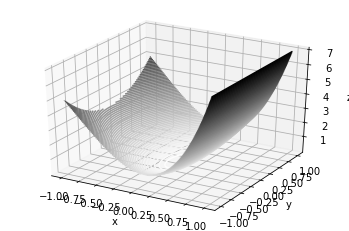

In [117]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [75]:
def gold_sec(func,a,b,x_0,y_0,eps):
    x = np.array([a,b])
    P = (1+ math.sqrt(5))/2
    N = math.trunc(math.log(2*eps/(b-a))/math.log((math.sqrt(5)-1)/2)) + 1
    u = np.zeros(2)
    for i in range(N):
        u[0] = x[1] - (x[1] - x[0])/P
        u[1] = x[0] + (x[1] - x[0])/P
        if(func(x_0,y_0,u[0]) > func(x_0,y_0,u[1])):
            x[0] = u[0]
        else:
            x[1] = u[1]
    return (x[1]+x[0])/2

In [171]:
    x = np.array([0.1,0.11])
    eps = 10**(-2)
    
    value_0 = f(x[0],x[1])
    N = 0;
    while True:
        tau = gold_sec(Ft,0.01,2,x[0],x[1],10**(-2))
        x[0] = x[0] - tau*df_dx(x[0],x[1])
        x[1] = x[1] - tau*df_dy(x[0],x[1])
        print(x[0],x[1])
        value_1 = f(x[0],y[0])
        if ((abs(value_1 - value_0)<eps) or (N>100)):
            break
        value_0 = value_1

-0.0012575313170008623 0.08871488645537062
0.008381903223222669 0.005725359102523017
